In [1]:
import importlib
import time
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.utils.extmath import randomized_svd

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from multi_loc import covariance, assimilate

In [3]:
%matplotlib inline

In [4]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [5]:
dimension = 2**9
print(dimension)
rho0 = 0.1
dx = 1/dimension

H = np.eye(dimension)[::2]
obs_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

512


In [6]:
eig_val, eig_vec, P, sort_ind = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_sqd_exp_1d,
    return_Corr=True,
    return_sort_ind=True)
R = np.eye(obs_size)

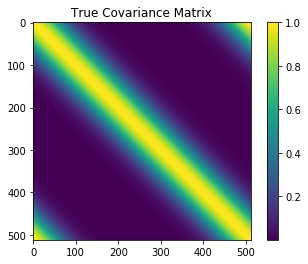

In [7]:
imshow(P, 'True Covariance Matrix')

In [8]:
trans_mats = assimilate.transformation_matrices(
    H, P=P,
    R=R, return_Ts=True)

for key, val in trans_mats.items():
    print(key)
    exec(key + '=val')

P_sqrt
P_inv_sqrt
R_sqrt
R_inv_sqrt
U
S
VT
H
Tx
Tx_inv
Ty
Ty_inv


In [242]:
%%timeit
aU, aS, aV = sp.linalg.svd(P)

40.7 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [243]:
%%timeit
aU, aS, aV = randomized_svd(P, 3)

12.9 ms ± 730 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [155]:
sig_num = 13
rU, rs, rV = randomized_svd(P, sig_num)

In [244]:
%%timeit
covariance.matrix_sqrt(P)

77 ms ± 907 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [246]:
%%timeit -r 7 -n 10
sp.linalg.sqrtm(P)

374 ms ± 5.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [255]:
%%timeit
aU, aS, aV = randomized_svd(P, n_components=1, n_oversamples=2, n_iter=2)

4.32 ms ± 69.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [256]:
aU, aS, aV = randomized_svd(P,
                            n_components=1,
                            n_oversamples=2,
                            n_iter=2)